#### Importing required libraries like numpy,pandas,matplotlib and CV2

In [1]:
import cv2
import os
import pandas as pd
import gradio as gr
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

#### Importing image and displaying it in notebook

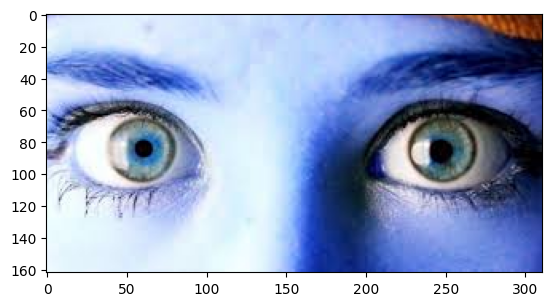

In [2]:
img = cv2.imread('./Dataset/test_images/test_2.jpg')
if img is None:
    print("Failed to load image. Check the file path.")
else:
    plt.imshow(img)
    plt.show()

#### Converting image from RGB to GRAY

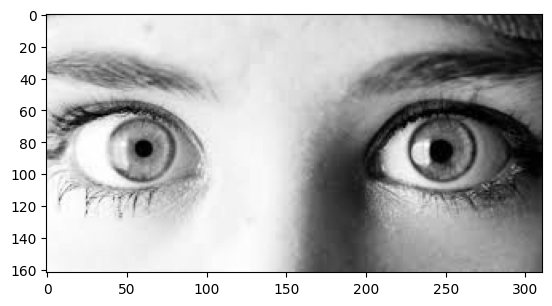

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

#### Detecting Eyes in image using openCV eye haarcascade

In [4]:
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

eyes = eye_cascade.detectMultiScale(gray)

In [5]:
len(eyes)

2

In [6]:
(x1,y1,w1,h1) = eyes[0] # left
(x2,y2,w2,h2) = eyes[1] # rigth

#### Marking Eyes deteced

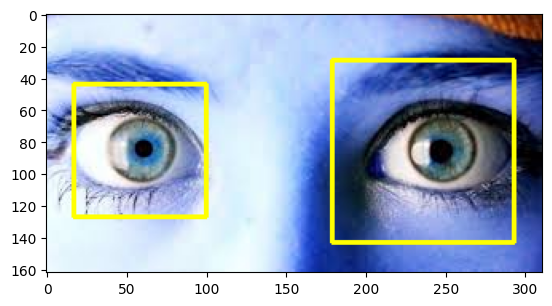

In [7]:
l_eye_rect = cv2.rectangle(img,(x1,y1),(x1+w1,y1+h1),(255,255,0),2)
r_eye_rect = cv2.rectangle(img,(x2,y2),(x2+w2,y2+h2),(255,255,0),2)
plt.imshow(r_eye_rect)

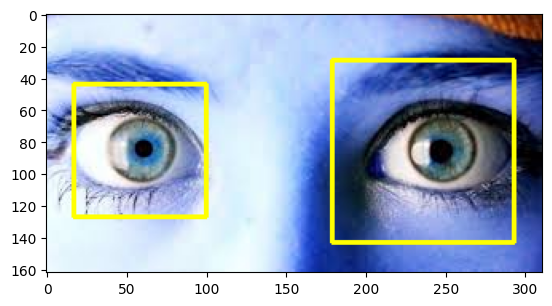

In [8]:
r_eye_rect = cv2.rectangle(img,(x2,y2),(x2+w2,y2+h2),(255,255,0),2)
plt.imshow(r_eye_rect)


#### cropping left and right eyes from image

In [9]:
left_croped = img[y1:y1+h1, x1:x1+w1]
rigth_croped = img[y2:y2+h2, x2:x2+w2]

print(left_croped.shape)
print(rigth_croped.shape)

(114, 114, 3)
(83, 83, 3)


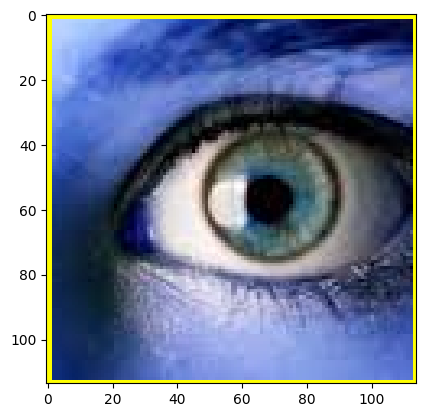

In [10]:
plt.imshow(left_croped)

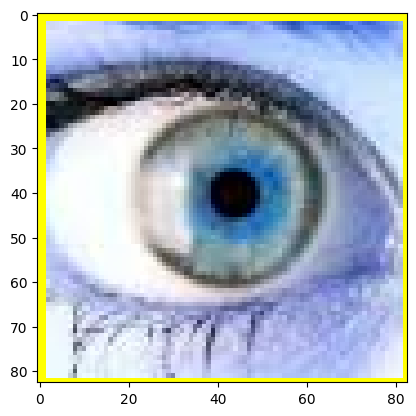

In [11]:
plt.imshow(rigth_croped)

### Combining code into function which take img as input and gives cropped rigth & left eye

In [12]:
def get_left_rigth_cropped_eyes(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
    
    eyes = eye_cascade.detectMultiScale(gray)
    
    if len(eyes) != 2 :
        return 0,0
    (x1,y1,w1,h1) = eyes[0]
    (x2,y2,w2,h2) = eyes[1]
    
    left_croped = img[y2:y2+h2, x2:x2+w2]
    rigth_croped = img[y1:y1+h1, x1:x1+w1]
    return left_croped,rigth_croped

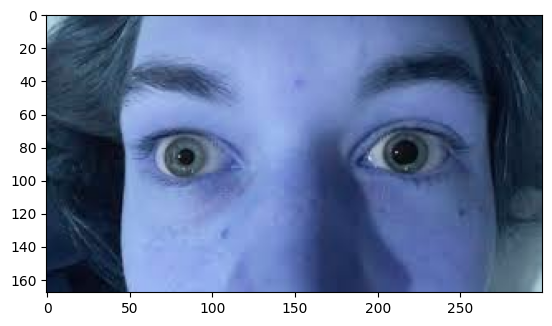

In [13]:
img2 = cv2.imread('./Dataset/test_images/test_1.jpg')
plt.imshow(img2, cmap='gray')

In [14]:
left_croped_1,rigth_croped_1 = get_left_rigth_cropped_eyes('./Dataset/test_images/test_2.jpg')
print(left_croped_1.shape)
print(rigth_croped_1.shape)

(83, 83, 3)
(114, 114, 3)


In [15]:
# plt.imshow(left_croped_1)

In [16]:
# plt.imshow(rigth_croped_1)

### Importing dataset images with OS library 

In [17]:
path_to_raw_data = "./Dataset/Raw_img/"
path_to_renamed_data = "./Dataset/renamed_dataset/"
path_for_cropped = "./Dataset/Cropped_img"
path_for_non_anisocoria = "./Non_anisocoria_img/"
img_paths = []
img_names = []

#### Scanning the directory 

In [18]:
for entry in os.scandir(path_to_raw_data):
    img_paths.append(entry.path)
    #print(entry.path)

In [19]:
print('Total Image :',len(img_paths))
print('Image1 path :',img_paths[0])

Total Image : 87
Image1 path : ./Dataset/Raw_img/10.jfif


**Go through all images in dataset folder and create Renamed images for them. There will be Renamed folder after you run this code**

### Looping all the images of renamed dataset and cropping and storing left and rigth image

### Code to scan the left & rigth cropped images from directory  

In [20]:
# count = 1
# for entry in os.scandir(path_for_non_anisocoria):
    
# #     if count ==11 :
# #         break
#     count = count +1
    
#     left = entry.path+'/1L'
#     rigth = entry.path+'/1R'

#     for l in os.scandir(entry.path+'/1L'):
#         left = l.path
#     for r in os.scandir(entry.path+'/1R'):
#         rigth = r.path
        
#     left_img = cv2.imread(left)
#     rigth_img = cv2.imread(rigth)
    
#     resized_l = cv2.resize(left_img,(400,300))
#     resized_r = cv2.resize(rigth_img,(400,300))
    

#     arr_l = find_pupil(resized_l)
#     arr_r = find_pupil(resized_r)
    
#     print(f"left radis :{arr_l[1]} , rigth radius ;{arr_r[1]}, Difference : {arr_l[1]-arr_r[1]}")
    
#     if arr_l[1]-arr_r[1] > 10 or arr_r[1]-arr_l[1] > 10:
# #         show(arr_l[2],left)
# #         show(arr_r[2],rigth)
#         show(arr_l[0],left)
#         show(arr_r[0],rigth)
    

In [21]:
# 8 17 44 47 53 79 86 90 96

In [22]:
df = pd.read_csv('./Dataset/dataset.csv')
df.tail()

,radius_diff,Disease
89,0,0
90,2,0
91,1,0
92,2,0
93,2,0


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( df[['radius_diff']] , df.Disease , train_size=0.8)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [25]:
model.fit(x_train,y_train)

LogisticRegression()

In [26]:
x_test.head()

,radius_diff
8,1
42,10
93,2
90,2
35,5


In [27]:
model.score(x_train,y_train)

1.0

In [28]:
val = model.predict([[13]])
val[0]

C:\Users\nandi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [29]:
temp = [[13]]
print(model.predict_proba(temp))
print(model.predict(temp))

[[3.55044624e-08 9.99999964e-01]]
[1]


C:\Users\nandi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\nandi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# All code combined into module

In [30]:
def show(img,text="image"):
    cv2.imshow(text, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [31]:
def get_left_rigth_cropped_eyes(img):
    
    eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
    
    eyes = eye_cascade.detectMultiScale(img)
    
    if len(eyes) < 2 :
        return [0],[0]
    
    (x1,y1,w1,h1) = eyes[0]
    (x2,y2,w2,h2) = eyes[1]
    
    left_croped = img[y2:y2+h2, x2:x2+w2]
    rigth_croped = img[y1:y1+h1, x1:x1+w1]
    
    return left_croped,rigth_croped

In [32]:
def valide_radius(circles):
    l = []
    for item in circles:
        X = item[0][0]
        Y = item[0][1]
        R = item[1]
        
        if R < 40 and R > 12:
            if Y < 240 and Y > 60:
                l.append([(X,Y), R])
    return l


In [33]:
def find_pupil(img):
    gray_img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #show(gray_img)
    gray_img= cv2.GaussianBlur(gray_img, (7,7),0)
    #show(gray_img)
    
    
    _, threshold = cv2.threshold(gray_img,25,255, cv2.THRESH_BINARY_INV)
    #show(threshold)
    
    contours, heirarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contour = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
    
    circles = [] 
    
    for cnt in contour:
        (x, y, w, h) = cv2.boundingRect(cnt)
        #cv2.drawContours(img, [cnt], -1, (0,0,255), 3)
        
        #cv2.rectangle(img, (x, y), (x+w, y+h), (0,0,255), 2)
        
        (cx,cy), radius = cv2.minEnclosingCircle(cnt)
        
        center = (int(cx), int(cy))
        radius = int(radius)
        
        circles.append([center,radius])
        
    valide_points = valide_radius(circles)
    
    if len(valide_points) == 0:
        valide_points.append(circles[0])
    
    #print(valide_points)
    X = valide_points[0][0][0]
    Y = valide_points[0][0][1]
    R = valide_points[0][1]
    
    cv2.circle(img, (X,Y), R, (255,0,255), 2)
        
    return [img,R,threshold]

In [34]:
def anisocoria_result(img):
    left_cropped,rigth_cropped = get_left_rigth_cropped_eyes(img)
    
    if len(left_cropped) == 1 or len(rigth_cropped) == 1:
        print("Eyes not detected")
        return
        
    left_img = cv2.resize(left_cropped,(300,300))
    rigth_img = cv2.resize(rigth_cropped,(300,300))
    
    #show(left_img)
    #show(rigth_img)
    
    l_result = find_pupil(left_img)
    r_result = find_pupil(rigth_img)
    
    #print("Left Pupil Radius :",l_result[1])
    print1 = "Left Pupil Radius :" + str(l_result[1])
    print2 = "Right Pupil Radius :" + str(r_result[1])
    #print("rigth Pupil Radius :",r_result[1])
    diff = abs(l_result[1] - r_result[1])
    
    predicted = model.predict([[diff]])
    print(predicted[0])
    
    result = "Anisocoria "
    if predicted[0] == 1:
        result = result + "Detected"
    else:
        result = result + "Not Detected"
    
    
    return left_cropped,rigth_cropped,l_result[0],r_result[0],print1,print2,result

In [35]:
img = cv2.imread('./Dataset_anisocoria/test_images/test_5.jpg')
#show(img)
result = anisocoria_result(img)


Eyes not detected


In [36]:
custom_css = """
<style>
.output-root {
    display: flex;
    flex-direction: row;
    flex-wrap: wrap;
    justify-content: space-evenly;
}

.output-root > div {
    flex: 1;
    margin: 10px;
}
</style>
"""

iface = gr.Interface(fn=anisocoria_result,
                      inputs=['image'],
                     outputs=[
        gr.Image(type="numpy", label="Image 1"),
        gr.Image(type="numpy", label="Image 2"),
        gr.Image(type="numpy", label="Image 3"),
        gr.Image(type="numpy", label="Image 4"),
        gr.Textbox(label="Text 1"),
        gr.Textbox(label="Text 2"),
        gr.Textbox(label="Result"),
    ],
    title="Anisocoria Detection",
    
    
)
iface.launch()



* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
